# Import Data

In [50]:
#First import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
# Import CSV file

crime = pd.read_csv("KCPD_Crime_Data_2017.csv")

moon = pd.read_csv("Moon_Data_2017.csv")

In [52]:
crime.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,170086272,10/5/17,10:00,10/4/17,16:00,10/5/17,10:00,690,23H,Stealing All Other,...,PJ4582,MPD,U,1,SUS,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,170026074,4/12/17,13:01,3/20/17,11:30,4/11/17,0:45,630,23C,Stealing Shoplifting,...,PJ2875,EPD,U,1,VIC,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,170003559,1/15/17,2:35,1/15/17,2:35,NaN,NaN,1850,35B,Possession of Drug E,...,PP0269,NPD,U,1,ARR,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,170001089,1/5/17,11:40,1/5/17,11:40,NaN,NaN,1849,35A,Possession/Sale/Dist,...,PJ1046,CPD,U,1,VIC,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,170007467,1/30/17,13:04,1/27/17,21:25,1/27/17,22:30,670,23D,Stealing from Buildi,...,PJ2012,EPD,U,1,VIC,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [53]:
moon.head()

,Date,Moon Phase,Illumination
0,1/1/17,Waxing Cresent,10%
1,1/2/17,Waxing Cresent,17%
2,1/3/17,Waxing Cresent,26%
3,1/4/17,Waxing Cresent,36%
4,1/5/17,First Quarter,47%


# Clean it up

In [54]:
#Drop the columns we don't need
newcrime = crime.drop(['Reported_Date',
                          'Reported_Time',
                          'To_Date',
                          'To_Time',
                          'IBRS',
                          'Rep_Dist',
                          'Area',
                          'DVFlag',
                          'Invl_No',
                          'Involvement',
                          'Report_No'], axis=1)                      

In [55]:
newcrime

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,10/4/17,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,3/20/17,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,1/15/17,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,1/5/17,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,1/27/17,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
5,1/14/17,6:38,702,Auto Theft,635.0,4300 N CORRINGTON AV,KANSAS CITY,64116,NaN,NaN,NaN,N,4300 N CORRINGTON AV\nKANSAS CITY 64116\n(39.1...
6,12/7/17,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
7,5/2/17,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
8,4/21/17,15:00,2601,Misc Violation,323.0,6600 E 23 TR,KANSAS CITY,64127,U,U,NaN,N,6600 E 23 TR\nKANSAS CITY 64127\n
9,5/6/17,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."


In [56]:
# Create a plot of number of crimes per day vs. moon phase by day

#First we want group number of crime by  date

crime_grouped_by_day = newcrime.groupby(['From_Date'])


In [57]:
crime_grouped_by_day.count().head().reset_index()

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,1/1/03,2,2,2,2,2,2,2,2,2,2,2,2
1,1/1/04,4,4,4,4,4,4,4,4,4,2,4,4
2,1/1/05,6,6,6,6,6,6,6,6,6,5,6,6
3,1/1/06,5,5,5,5,5,5,5,5,5,2,5,5
4,1/1/07,8,8,8,8,8,8,8,8,8,7,8,8


In [58]:
#Since we can see that this datafame includes crimes that were commited before 2017 but reported in the year of 2017

#turn the From_Date Column into a field object
newcrime['From_Date']= pd.to_datetime(newcrime['From_Date'])


In [62]:
newcrime.head(5)

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,2017-03-20,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,2017-01-05,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [60]:
#So we need to filter out data that includes records before 2017

newcrime['From_Date'] = date[(newcrime['From_Date'].dt.year == 2017)]



In [61]:
newcrime

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,2017-03-20,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,2017-01-05,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
5,2017-01-14,6:38,702,Auto Theft,635.0,4300 N CORRINGTON AV,KANSAS CITY,64116,NaN,NaN,NaN,N,4300 N CORRINGTON AV\nKANSAS CITY 64116\n(39.1...
6,2017-12-07,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
7,2017-05-02,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
8,2017-04-21,15:00,2601,Misc Violation,323.0,6600 E 23 TR,KANSAS CITY,64127,U,U,NaN,N,6600 E 23 TR\nKANSAS CITY 64127\n
9,2017-05-06,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."


In [66]:

#drop na's axis 0 tells it drop the rows that have na's
newcrime = newcrime.dropna(axis=0)

In [67]:
newcrime

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
6,2017-12-07,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
7,2017-05-02,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
9,2017-05-06,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."
11,2017-10-27,15:00,2402,Disorderly Conduct,542.0,E BANNISTER RD and NEWTON DR,KANSAS CITY,64134,B,F,42.0,N,E BANNISTER RD\nKANSAS CITY 64134\n
13,2017-05-09,18:27,2655,Trespassing,333.0,4400 E 39 ST,KANSAS CITY,64130,B,M,48.0,N,4400 E 39 ST\nKANSAS CITY 64130\n
14,2017-09-30,17:55,2655,Trespassing,132.0,00 W 38 ST,KANSAS CITY,64111,W,M,40.0,N,00 W 38 ST\nKANSAS CITY 64111\n
15,2017-01-25,8:15,501,Burglary - Residence,131.0,3300 WEST COLEMAN RD,KANSAS CITY,64111,W,M,45.0,N,3300 WEST COLEMAN RD\nKANSAS CITY 64111\n(39.0...
16,2017-09-03,18:00,501,Burglary - Residence,343.0,2900 DENVER AV,KANSAS CITY,64128,U,M,35.0,N,"2900 DENVER AV\nKANSAS CITY 64128\n(39.072637,..."


In [70]:
#check if we have any more nulls (na's) in the data set
newcrime['From_Date'].isnull().sum()

0

In [75]:
crime_grouped_by_day = newcrime.groupby(['From_Date'])

In [88]:
#Created a new dataframe with he crime data grouped by From_Date
crime_grouped_by_day_df = crime_grouped_by_day.count().reset_index()

,From_Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,260,260,260,260,260,260,260,260,260,260,260,260
1,2017-01-02,180,180,180,180,180,180,180,180,180,180,180,180
2,2017-01-03,159,159,159,159,159,159,159,159,159,159,159,159
3,2017-01-04,153,153,153,153,153,153,153,153,153,153,153,153
4,2017-01-05,142,142,142,142,142,142,142,142,142,142,142,142
5,2017-01-06,150,150,150,150,150,150,150,150,150,150,150,150
6,2017-01-07,165,165,165,165,165,165,165,165,165,165,165,165
7,2017-01-08,139,139,139,139,139,139,139,139,139,139,139,139
8,2017-01-09,230,230,230,230,230,230,230,230,230,230,230,230
9,2017-01-10,212,212,212,212,212,212,212,212,212,212,212,212


In [95]:
#rename the From_Date to make the merge smooth

#crime_grouped_by_day_df = pd.DataFrame({'From_Date': 'Date'})

crime_grouped_by_day_df= crime_grouped_by_day_df.rename(columns={'From_Date': 'Date'})


In [97]:
crime_grouped_by_day_df.head(5)

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,260,260,260,260,260,260,260,260,260,260,260,260
1,2017-01-02,180,180,180,180,180,180,180,180,180,180,180,180
2,2017-01-03,159,159,159,159,159,159,159,159,159,159,159,159
3,2017-01-04,153,153,153,153,153,153,153,153,153,153,153,153
4,2017-01-05,142,142,142,142,142,142,142,142,142,142,142,142


In [89]:
#Now we need to convert the date column in the moon data so that we can merge the two data set on date!
#wow this is so exciting!

#turn the From_Date Column into a field object
moon['Date']= pd.to_datetime(moon['Date'])

In [109]:
#so the moon data needs to cleaned up too since we have so many nulls

moon.head(367)

,Date,Moon Phase,Illumination
0,2017-01-01,Waxing Cresent,10%
1,2017-01-02,Waxing Cresent,17%
2,2017-01-03,Waxing Cresent,26%
3,2017-01-04,Waxing Cresent,36%
4,2017-01-05,First Quarter,47%
5,2017-01-06,Waxing Gibbous,58%
6,2017-01-07,Waxing Gibbous,69%
7,2017-01-08,Waxing Gibbous,79%
8,2017-01-09,Waxing Gibbous,88%
9,2017-01-10,Waxing Gibbous,94%


In [110]:
#drop na's axis 0 tells it drop the rows that have na's
moon = moon.dropna(axis=0)

In [111]:
moon

,Date,Moon Phase,Illumination
0,2017-01-01,Waxing Cresent,10%
1,2017-01-02,Waxing Cresent,17%
2,2017-01-03,Waxing Cresent,26%
3,2017-01-04,Waxing Cresent,36%
4,2017-01-05,First Quarter,47%
5,2017-01-06,Waxing Gibbous,58%
6,2017-01-07,Waxing Gibbous,69%
7,2017-01-08,Waxing Gibbous,79%
8,2017-01-09,Waxing Gibbous,88%
9,2017-01-10,Waxing Gibbous,94%


# Merge the Datasets

In [112]:
#NOW IT'S TIME TO MERGE!

fulldata = pd.merge(moon,crime_grouped_by_day_df, on='Date', how='left')

In [113]:
fulldata

,Date,Moon Phase,Illumination,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-01-01,Waxing Cresent,10%,260,260,260,260,260,260,260,260,260,260,260,260
1,2017-01-02,Waxing Cresent,17%,180,180,180,180,180,180,180,180,180,180,180,180
2,2017-01-03,Waxing Cresent,26%,159,159,159,159,159,159,159,159,159,159,159,159
3,2017-01-04,Waxing Cresent,36%,153,153,153,153,153,153,153,153,153,153,153,153
4,2017-01-05,First Quarter,47%,142,142,142,142,142,142,142,142,142,142,142,142
5,2017-01-06,Waxing Gibbous,58%,150,150,150,150,150,150,150,150,150,150,150,150
6,2017-01-07,Waxing Gibbous,69%,165,165,165,165,165,165,165,165,165,165,165,165
7,2017-01-08,Waxing Gibbous,79%,139,139,139,139,139,139,139,139,139,139,139,139
8,2017-01-09,Waxing Gibbous,88%,230,230,230,230,230,230,230,230,230,230,230,230
9,2017-01-10,Waxing Gibbous,94%,212,212,212,212,212,212,212,212,212,212,212,212


# Time to Plot the Data

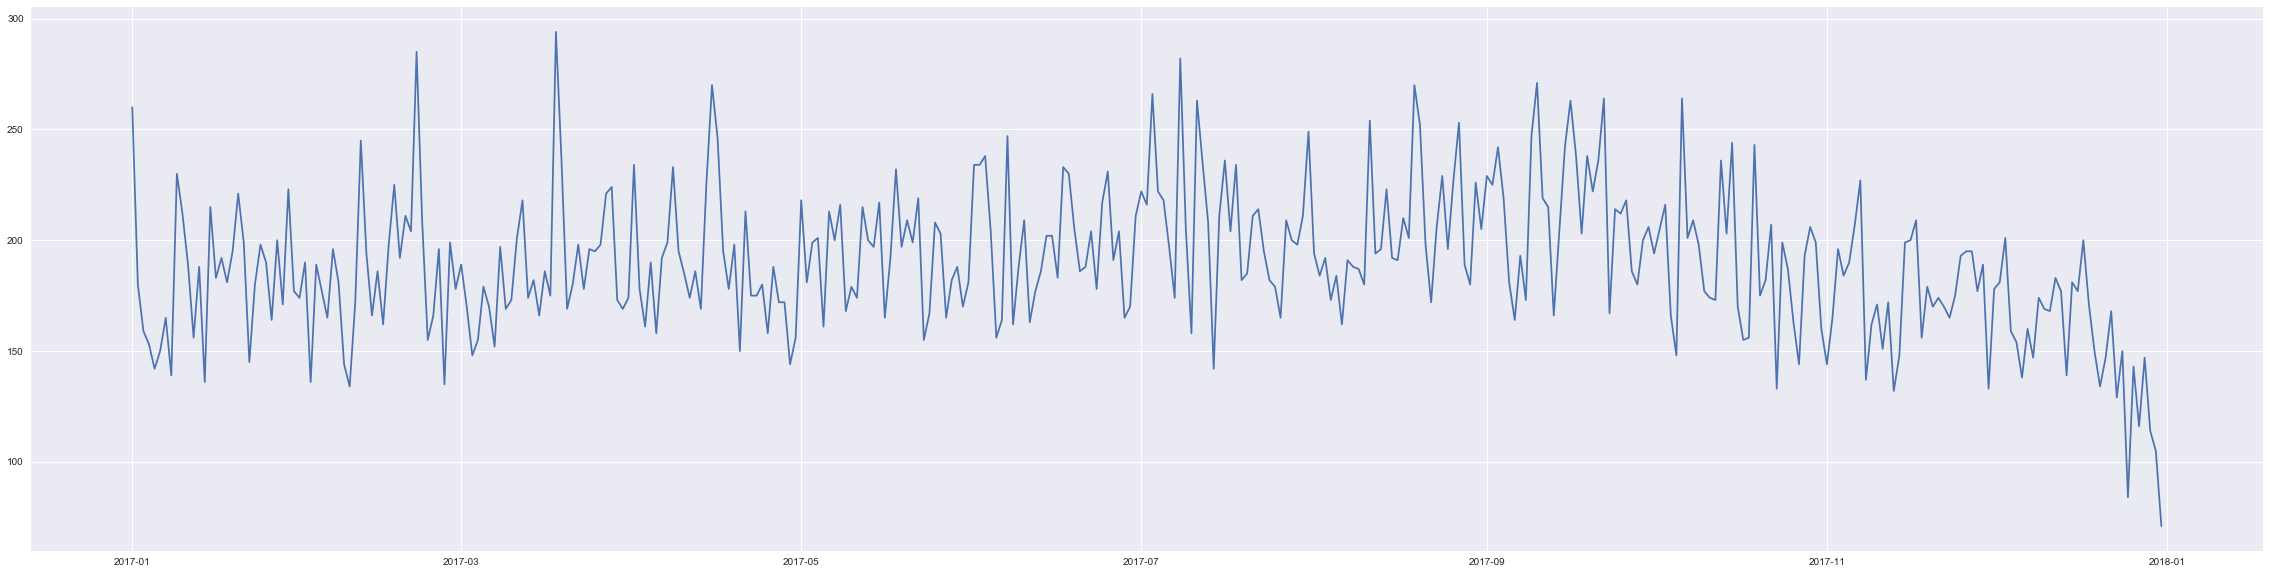

In [135]:
#Plot the number of crime by date

x = fulldata['Date']
y =fulldata['Offense']


crime_by_date = plt.plot(x, y)

fig = plt.gcf()
fig.set_size_inches(40,10)

sns.set(style="darkgrid")

plt.show(crime_by_date)

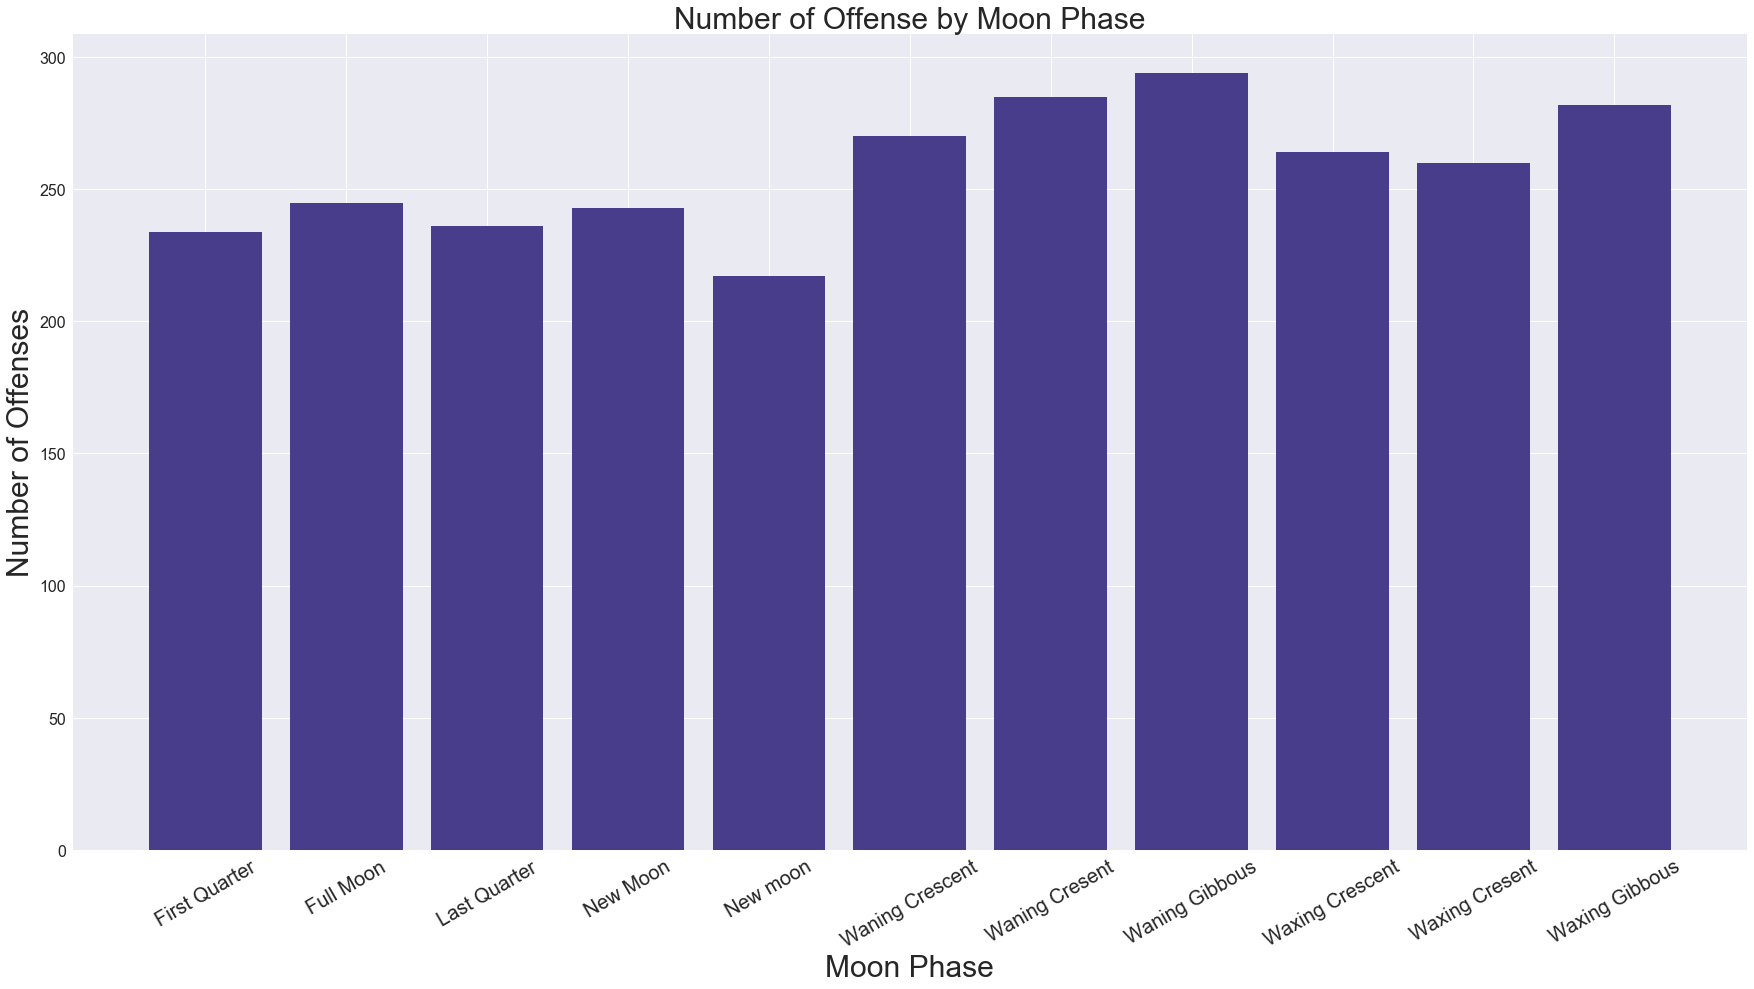

In [173]:
#Plot the number of crime by moon phase

#add labels and such
sns.set(style="darkgrid")
plt.title("Number of Offense by Moon Phase", fontsize =30)
plt.xlabel("Moon Phase", fontsize=30)
plt.ylabel("Number of Offenses", fontsize =30)

x = fulldata['Moon Phase']
y =fulldata['Offense']

plt.xticks(rotation=30,fontsize =20)
plt.yticks(fontsize =16)

crime_by_moonphase= plt.bar(x, y, color = "DarkSlateBlue")

fig = plt.gcf()
fig.set_size_inches(30,15)

sns.set(style="darkgrid")

#save an image of the plot to the output folder
plt.savefig('Pics/CrimebyMoonPhase.png')

#show plot
plt.show(crime_by_moonphase)